## Chapter 14. Data Analysis Examples
<a id='index'></a>

## Table of Content
- [14.1 1.USA.gov Data from Bitly](#141)
    - [14.1.1 Counting Time Zones in Pure Python](#1411)
    - [14.1.2 Counting Time Zones with pandas](#1412)
- [14.2 MovieLens 1M Dataset](#142)
    - [14.2.1 Measuring Rating Disagreement](#1421)
- [14.3 US Baby Names 1880-2010](#143)

<hr>

In [5]:
import numpy as np
import pandas as pd

<hr>

## 14.1 1.USA.gov Data from Bitly
<a id='141'></a>
In 2011, URL shortening service Bitly partnered with the US government website USA.gov to provide a feed of anonymous data gathered from users who shorten links ending with .gov or .mil. In 2011, a live feed as well as hourly snapshots were available as downloadable text files. This service is shut down at the time of this writing (2017), but we preserved one of the data files for the book’s examples.
In the case of the hourly snapshots, each line in each file contains a common form of web data known as JSON, which stands for JavaScript Object Notation. For example, if we read just the first line of a file we may see something like this:

In [6]:
path = 'datasets/bitly_usagov/example.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [7]:
# Python has both bulit-in and 3rd party libraries for converting a JSON string into a Python dictionary object
import json
records = [json.loads(line) for line in open(path)]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

### 14.1.1 Counting Time Zones in Pure Python
<a id='1411'></a>
Suppose we were interested in finding the most often-occurring time zones in the dataset (the tz field). There are many ways we could do this. First, let’s extract a list of time zones again using a list comprehension:

In [8]:
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

In [9]:
# Turns out that not all of the records have a time zone field. So we add the check if 'tz' in rec
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [10]:
# Two approaches to produce counts by time zone
def get_counts(sequence):
    counts={}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

# Second way
from collections import defaultdict
def get_counts2(sequence):
    counts = defaultdict(int)  # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

counts = get_counts(time_zones)
counts['America/New_York']

1251

In [11]:
len(time_zones)

3440

In [12]:
# We wanted the top 10 time zones
def top_counts(count_dict, n=10):
    values_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    values_key_pairs.sort()
    return values_key_pairs[-n:]

top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [13]:
# You can also use collections.Counter
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### 14.1.2 Counting Time Zones with pandas
<a id='1412'></a>

In [15]:
frame = pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [16]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [17]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [18]:
# visualize this data using matplotlib
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'

tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

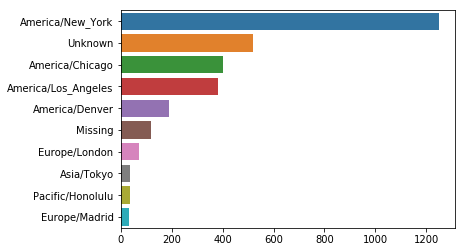

In [20]:
import seaborn as sns
subset = tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values)

In [21]:
# a field contains information about the browser, device, or application used to perform the URL shortening:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [22]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [23]:
frame['a'][51][:50]  # longl line

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [24]:
# split off the first token in the string (corresponding roughly to the browser capability) 
# and make another summary of the user behavior:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])
results.head()

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [25]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [26]:
# Now, suppose you wanted to decompose the top time zones into Windows and non-Windows users.
cframe = frame[frame.a.notnull()]
cframe['os'] = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')

cframe['os'].head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [33]:
by_tz_os = cframe.groupby(['tz', 'os'])
#cframe[['tz', 'os']]
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [37]:
# Finally, let’s select the top overall time zones. Construct an indirect index array from the row counts in agg_counts:
# Use to sort in ascending order
indexer = agg_counts.sum(1).argsort()
indexer.head()

tz
                       24
Africa/Cairo           20
Africa/Casablanca      21
Africa/Ceuta           92
Africa/Johannesburg    87
dtype: int64

In [44]:
# use take to select the rows in that order, then slice off the last 10 rows (largest values):
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [45]:
# pandas has a convenience method called nlargest that does the same thing:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [50]:
# Rearrange the data for plotting
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()
count_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


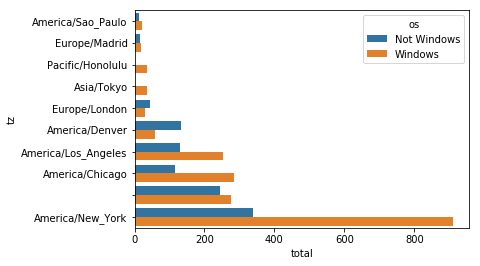

In [58]:
sns.barplot(x='total', y='tz', hue='os', data=count_subset)

In [55]:
# let’s normalize the group percentages to sum to 1:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

results = count_subset.groupby('tz').apply(norm_total)
results

,tz,os,total,normed_total
0,America/Sao_Paulo,Not Windows,13.0,0.393939
1,America/Sao_Paulo,Windows,20.0,0.606061
2,Europe/Madrid,Not Windows,16.0,0.457143
3,Europe/Madrid,Windows,19.0,0.542857
4,Pacific/Honolulu,Not Windows,0.0,0.000000
5,Pacific/Honolulu,Windows,36.0,1.000000
6,Asia/Tokyo,Not Windows,2.0,0.054054
7,Asia/Tokyo,Windows,35.0,0.945946
8,Europe/London,Not Windows,43.0,0.581081
9,Europe/London,Windows,31.0,0.418919


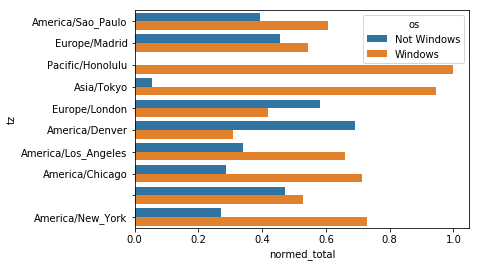

In [56]:
sns.barplot(x='normed_total', y='tz', hue='os', data=results)

In [59]:
# We could have computed the normalized sum more efficiently by using the transform method with groupby:
g = count_subset.groupby('tz')
results2 = count_subset.total / g.total.transform('sum')
results2

0     0.393939
1     0.606061
2     0.457143
3     0.542857
4     0.000000
5     1.000000
6     0.054054
7     0.945946
8     0.581081
9     0.418919
10    0.691099
11    0.308901
12    0.340314
13    0.659686
14    0.287500
15    0.712500
16    0.470250
17    0.529750
18    0.270983
19    0.729017
Name: total, dtype: float64

## 14.2 MovieLens 1M Dataset
<a id='142'></a>
***GroupLens Research*** provides a number of collections of movie ratings data collected from users of MovieLens in the late 1990s and early 2000s. The data provide movie ratings, movie metadata (genres and year), and demographic data about the users (age, zip code, gender identification, and occupation). Such data is often of interest in the development of recommendation systems based on machine learning algorithms. While we do not explore machine learning techniques in detail in this book, I will show you how to slice and dice datasets like these into the exact form you need.
The MovieLens 1M dataset contains 1 million ratings collected from 6,000 users on 4,000 movies. It’s spread across three tables: ratings, user information, and movie information. After extracting the data from the ZIP file, we can load each table into a pandas DataFrame object using ***pandas.read_table***:

In [35]:
# Make display smaller
pd.options.display.max_rows = 10

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('datasets/movielens/users.dat', sep='::', header=None, names=unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('datasets/movielens/ratings.dat', sep='::', header=None, names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep='::', header=None, names=mnames)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()


In [36]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [37]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [38]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [39]:
# Using pandas’s merge function, we first merge ratings with users and then merge that 
# result with the movies data. pandas infers which columns to use as the merge (or join) 
# keys based on overlapping names:
data = pd.merge(pd.merge(ratings, users), movies)

data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [40]:
# To get mean movie ratings for each film grouped by gender, we can use the pivot_table method:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


This produced another DataFrame containing mean ratings with movie titles as row labels (the “index”) and gender as column labels. I first filter down to movies that received at least 250 ratings (a completely arbitrary number); to do this, I then group the data by title and use size() to get a Series of group sizes for each title:

In [43]:
ratings_by_title = data.groupby('title').size()
ratings_by_title

title
$1,000,000 Duck (1971)                         37
'Night Mother (1986)                           70
'Til There Was You (1997)                      52
'burbs, The (1989)                            303
...And Justice for All (1979)                 199
                                             ... 
Zed & Two Noughts, A (1985)                    29
Zero Effect (1998)                            301
Zero Kelvin (Kj�rlighetens kj�tere) (1995)      2
Zeus and Roxanne (1997)                        23
eXistenZ (1999)                               410
Length: 3706, dtype: int64

In [44]:
active_titles = ratings_by_title.index[ratings_by_title > 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1214)

In [49]:
# The index of titles receiving at least 250 ratings can then be used to select rows from mean_ratings:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [51]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
...,...,...
"Avengers, The (1998)",1.915254,2.017467
Speed 2: Cruise Control (1997),1.906667,1.863014
Rocky V (1990),1.878788,2.132780


### 14.2.1 Measuring Rating Disagreement
<a id='1421'></a>
Suppose you wanted to find the movies that are most divisive between male and female viewers. One way is to add a column to mean_ratings containing the differ‐ ence in means, then sort by that:

In [52]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
...,...,...,...
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
"Longest Day, The (1962)",3.411765,4.031447,0.619682
Dumb & Dumber (1994),2.697987,3.336595,0.638608


In [54]:
# Reversed the order to see the best in Men
sorted_by_diff[::-1]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
...,...,...,...
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Little Women (1994),3.870588,3.321739,-0.548849
Grease (1978),3.975265,3.367041,-0.608224


In [56]:
# Standard deviation of rating grouped by title
ratings_std_by_title = data.groupby('title')['rating'].std()

# Filter down to active_title
ratings_std_by_title = ratings_std_by_title.loc[active_titles]

# Order Series by value in descending order
ratings_std_by_title.sort_values(ascending=False)

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
                                           ...   
Wrong Trousers, The (1993)               0.708666
Shawshank Redemption, The (1994)         0.700443
Great Escape, The (1963)                 0.692585
Rear Window (1954)                       0.688946
Close Shave, A (1995)                    0.667143
Name: rating, Length: 1214, dtype: float64

<hr>

## 14.3 US Baby Names 1880-2010
<a id='143'></a>
The United States Social Security Administration (SSA) has made available data on the frequency of baby names from 1880 through the present. Hadley Wickham, an author of several popular R packages, has often made use of this dataset in illustrating data manipulation in R.
We need to do some data wrangling to load this dataset, but once we do that we will have a DataFrame, there are many things you might want to do with the dataset:
* Visualize the proportion of babies given a particular name (your own, or another name) over time
* Determine the relative rank of a name
* Determine the most popular names in each year or the names whose popularity has advanced or declined the most
* Analyze trends in names: vowels, consonants, length, overall diversity, changes in spelling, first and last letters
* Analyze external sources of trends: biblical names, celebrities, demographic changes

In [64]:
!head -n 5 datasets/babynames/yob1880.txt

In [65]:
names1880 = pd.read_csv('datasets/babynames/yob1880.txt', names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [67]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [ ]:
# Since the dataset is split into files by year, one of the first things to do is to assemble 
# all of the data into a single DataFrame and further to add a year field. 
# You can do this using pandas.concat:

years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
# concatenate everything into a single DataFrame

<hr>

[Back to top](#index)